In [1]:
# ------------------------------------------------------------
# Configuración Inicial del Entorno
# - Configura las rutas base del proyecto.
# - Verifica si el directorio `src` y sus subdirectorios existen.
# - Asegura que los módulos del proyecto sean accesibles.
# ------------------------------------------------------------

import sys
import os

# Establecer la ruta base del proyecto (un nivel hacia arriba desde el directorio actual)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Ruta hacia el directorio `src`, donde se almacenan los módulos del proyecto
SRC_PATH = os.path.join(BASE_DIR, "src")

# Agregar la ruta `src` a sys.path si no está ya presente
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)
    print(f"'src' agregado a sys.path correctamente: {SRC_PATH}")

# Mostrar todas las rutas actuales en sys.path (para confirmar la configuración)
print("Rutas actuales en sys.path:")
for path in sys.path:
    print(path)

# Verificar si el directorio `src` existe
print("\n¿Existe el directorio 'src'?")
print("SÍ" if os.path.exists(SRC_PATH) else "NO")

# Listar los archivos disponibles en el directorio `src`
print("\nArchivos en el directorio 'src':")
print(os.listdir(SRC_PATH))

# Ruta al subdirectorio `pdf_processing`, utilizado para procesar documentos PDF
PDF_PROCESSING_PATH = os.path.join(SRC_PATH, "pdf_processing")

# Verificar si el subdirectorio `pdf_processing` existe
print("\n¿Existe el subdirectorio 'pdf_processing'?")
print("SÍ" if os.path.exists(PDF_PROCESSING_PATH) else "NO")

# Listar los archivos dentro del subdirectorio `pdf_processing`
print("\nArchivos en 'pdf_processing':")
print(os.listdir(PDF_PROCESSING_PATH))

'src' agregado a sys.path correctamente: /Users/maximilianocruz/Documents/GitHub/practicos-rag/src
Rutas actuales en sys.path:
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python311.zip
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11
/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11/lib-dynload

/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11/site-packages
/Users/maximilianocruz/Documents/GitHub/practicos-rag/src

¿Existe el directorio 'src'?
SÍ

Archivos en el directorio 'src':
['retrievers', 'embedding', 'text_preprocessing', '__init__.py', 'pdf_processing', 'chunking', 'vector_store_client', 'evaluation', 'loaders']

¿Existe el subdirectorio 'pdf_processing'?
SÍ

Archivos en 'pdf_processing':
['__init__.py', '__pycache__', 'pdf_to_json.py']


In [2]:
# ------------------------------------------------------------
# Determinar la cantidad de páginas en cada archivo PDF
# ------------------------------------------------------------
import os
import pdfplumber

# Ruta al directorio con los archivos PDF
CAPITULOS_DIR = os.path.join(BASE_DIR, "data/capitulos")

# Obtener lista de archivos PDF
pdf_files = [f for f in os.listdir(CAPITULOS_DIR) if f.endswith(".pdf")]

# Lista para almacenar información sobre los PDFs
pdf_page_counts = []

# Inspeccionar cada archivo PDF
for pdf_file in pdf_files:
    pdf_path = os.path.join(CAPITULOS_DIR, pdf_file)
    try:
        with pdfplumber.open(pdf_path) as pdf:
            num_pages = len(pdf.pages)
            pdf_page_counts.append({"file_name": pdf_file, "page_count": num_pages})
            print(f"{pdf_file}: {num_pages} páginas")
    except Exception as e:
        print(f"Error al procesar {pdf_file}: {e}")

# Ordenar los archivos por cantidad de páginas
sorted_pdfs = sorted(pdf_page_counts, key=lambda x: x["page_count"])

# Mostrar los tres documentos con menor cantidad de páginas
print("\nTres documentos con menor cantidad de páginas:")
for pdf in sorted_pdfs[:3]:
    print(f"{pdf['file_name']}: {pdf['page_count']} páginas")

capitulo6.pdf: 110 páginas
capitulo15.pdf: 46 páginas
capitulo14.pdf: 38 páginas
capitulo7.pdf: 21 páginas
capitulo5.pdf: 53 páginas
capitulo16.pdf: 124 páginas
capitulo17.pdf: 66 páginas
capitulo4.pdf: 262 páginas
capitulo13.pdf: 20 páginas
capitulo12.pdf: 71 páginas
capitulo1.pdf: 4 páginas
capitulo3.pdf: 38 páginas
capitulo10.pdf: 76 páginas
capitulo11.pdf: 99 páginas
capitulo2.pdf: 78 páginas
capitulo20.pdf: 13 páginas
capitulo21.pdf: 44 páginas
capitulo22.pdf: 5 páginas
capitulo9.pdf: 115 páginas
capitulo8.pdf: 223 páginas
capitulo19.pdf: 4 páginas
capitulo18.pdf: 178 páginas

Tres documentos con menor cantidad de páginas:
capitulo1.pdf: 4 páginas
capitulo19.pdf: 4 páginas
capitulo22.pdf: 5 páginas


In [3]:
# ------------------------------------------------------------
# Importar y Validar la Función 'process_pdf_to_json'
# - Importa la función desde el módulo correspondiente.
# - Verifica que la función esté disponible y lista para usar.
# ------------------------------------------------------------

import importlib.util

# Ruta al archivo `pdf_to_json.py`
module_path = os.path.join(SRC_PATH, "pdf_processing", "pdf_to_json.py")

# Cargar el módulo dinámicamente
spec = importlib.util.spec_from_file_location("pdf_processing.pdf_to_json", module_path)
pdf_processing = importlib.util.module_from_spec(spec)
spec.loader.exec_module(pdf_processing)

# Verificar si la función `process_pdf_to_json` está disponible
if hasattr(pdf_processing, "process_pdf_to_json"):
    print("La función 'process_pdf_to_json' está disponible y lista para usar.")
else:
    print("Error: La función 'process_pdf_to_json' no está disponible.")

La función 'process_pdf_to_json' está disponible y lista para usar.


In [4]:
# ------------------------------------------------------------
# Procesar Archivos PDF a JSON
# - Lista los archivos PDF disponibles.
# - Usa 'process_pdf_to_json' para procesar y cargar los datos.
# - Verifica cuántos archivos se procesaron correctamente.
# ------------------------------------------------------------

import os

# Ruta a la carpeta con los capítulos en PDF
CAPITULOS_DIR = os.path.join(BASE_DIR, "data/capitulos")

# Obtener lista de archivos PDF en la carpeta
pdf_files = [f for f in os.listdir(CAPITULOS_DIR) if f.endswith(".pdf")]
print(f"Archivos PDF encontrados en '{CAPITULOS_DIR}': {len(pdf_files)}")

# Lista para almacenar datos procesados
processed_pdfs = []

# Procesar cada archivo PDF
for pdf_file in pdf_files:
    pdf_path = os.path.join(CAPITULOS_DIR, pdf_file)
    print(f"\nProcesando archivo PDF: {pdf_file}")
    try:
        # Procesar el archivo PDF a JSON
        pdf_data = pdf_processing.process_pdf_to_json(pdf_path)
        processed_pdfs.append({
            "file_name": pdf_file,
            "data": pdf_data
        })
        print(f"Archivo procesado con éxito: {pdf_file}")
    except Exception as e:
        print(f"Error al procesar el archivo {pdf_file}: {e}")

# Mostrar resumen de archivos procesados
print(f"\nArchivos procesados exitosamente: {len(processed_pdfs)}")

Archivos PDF encontrados en '/Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos': 22

Procesando archivo PDF: capitulo6.pdf
Archivo procesado con éxito: capitulo6.pdf

Procesando archivo PDF: capitulo15.pdf
Archivo procesado con éxito: capitulo15.pdf

Procesando archivo PDF: capitulo14.pdf
Archivo procesado con éxito: capitulo14.pdf

Procesando archivo PDF: capitulo7.pdf
Archivo procesado con éxito: capitulo7.pdf

Procesando archivo PDF: capitulo5.pdf
Archivo procesado con éxito: capitulo5.pdf

Procesando archivo PDF: capitulo16.pdf
Archivo procesado con éxito: capitulo16.pdf

Procesando archivo PDF: capitulo17.pdf
Archivo procesado con éxito: capitulo17.pdf

Procesando archivo PDF: capitulo4.pdf
Archivo procesado con éxito: capitulo4.pdf

Procesando archivo PDF: capitulo13.pdf
Archivo procesado con éxito: capitulo13.pdf

Procesando archivo PDF: capitulo12.pdf
Archivo procesado con éxito: capitulo12.pdf

Procesando archivo PDF: capitulo1.pdf
Archivo procesado con éxit

In [5]:
# ------------------------------------------------------------
# Verificar el contenido del JSON procesado para un archivo específico
# ------------------------------------------------------------
import json

# Seleccionar el archivo más corto (puede ser ajustado según necesidad)
target_file = "capitulo22.pdf"

# Buscar el archivo en la lista de PDFs procesados
target_pdf = next((pdf for pdf in processed_pdfs if pdf["file_name"] == target_file), None)

if target_pdf:
    file_name = target_pdf["file_name"]
    data = target_pdf["data"]
    
    print(f"\nVerificación del archivo: {file_name}")
    print(f"Estructura general del JSON: {list(data.keys())}")
    
    # Mostrar ejemplo del primer capítulo
    first_chapter = data['capitulos'][0]
    print(f"\nPrimer capítulo:")
    print(f"  Número: {first_chapter.get('numero', 'No disponible')}")
    print(f"  Título: {first_chapter.get('titulo', 'No disponible')}")
    
    # Mostrar ejemplo del primer artículo del capítulo
    first_article = first_chapter["articulos"][0]
    content_preview = first_article["contenido"][:2000] + "..." if len(first_article["contenido"]) > 500 else first_article["contenido"]
    print(f"\nPrimer artículo (truncado a 500 caracteres):")
    print(content_preview)
else:
    print(f"El archivo {target_file} no se encuentra entre los procesados.")


Verificación del archivo: capitulo22.pdf
Estructura general del JSON: ['capitulos']

Primer capítulo:
  Número: 1
  Título: Ejemplo de Título

Primer artículo (truncado a 500 caracteres):
CAP ÍTULO XX II 
 
Misceláneos  
 
 
Artículo 141 7 – (Resolución Conjunta SCS y SB  Nº 2/2024 ) 
Los ingredientes/productos que a continuación se listan deberán responder a las 
características que se establecen en cada caso:  
1. CLORURO DE POTASIO  
Identificación y pureza según lo establecido en JECFA, FCC y/o UE.  
Usos: como ingrediente para utilizarlo en reemplazo parcial o total del cloruro de sodio 
(NaCl) en todas las categorías de alimentos en cuya definición se establezca un límite 
máximo de contenido de sodio o como aditivo en los casos en que la normativa vigente así 
lo permita.  
 
2. ISOMALTO OLIGOSACÁRIDOS  
 
Con la denominación de Jarabe de isomalto -oligosacáridos o IMO jarabe, se entiende el 
producto obtenido mediante hidrólisis enzimática controlada del almidón de maíz, y que

In [6]:
# Ruta al archivo PDF desde la estructura mostrada en tu proyecto
CAPITULOS_DIR = os.path.join(BASE_DIR, "data", "capitulos")
pdf_path = os.path.join(CAPITULOS_DIR, "capitulo22.pdf")

# Verificar si el archivo existe en la ruta
if os.path.exists(pdf_path):
    print(f"El archivo existe en: {pdf_path}")
    try:
        # Abrir el archivo PDF y extraer texto
        with pdfplumber.open(pdf_path) as pdf:
            raw_text = ""
            for page in pdf.pages:
                raw_text += page.extract_text() if page.extract_text() else ""

        print("\nTexto crudo extraído (truncado a 1000 caracteres):")
        print(raw_text[:1000] + "..." if len(raw_text) > 1000 else raw_text)

    except Exception as e:
        print(f"Error al extraer texto del PDF: {e}")
else:
    print(f"El archivo no existe en la ruta: {pdf_path}")
    

# ------------------------------------------------------------
# Diagnóstico del preprocesamiento de tablas
# ------------------------------------------------------------
from text_preprocessing.text_processing_v2 import preprocess_text_v2

# Cargar texto crudo del PDF procesado previamente
raw_text = processed_pdfs[-1]["data"]["capitulos"][0]["articulos"][0]["contenido"]

# Preprocesar el texto
preprocessed_text = preprocess_text_v2(raw_text)

# Mostrar el texto preprocesado (primeros 1000 caracteres)
print("\nTexto preprocesado (truncado a 1000 caracteres):")
print(preprocessed_text[:1000])

El archivo existe en: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo22.pdf

Texto crudo extraído (truncado a 1000 caracteres):
CAPÍTULO XXII
Misceláneos
Artículo 1417 – (Resolución Conjunta SCS y SB Nº 2/2024)
Los ingredientes/productos que a continuación se listan deberán responder a las
características que se establecen en cada caso:
1. CLORURO DE POTASIO
Identificación y pureza según lo establecido en JECFA, FCC y/o UE.
Usos: como ingrediente para utilizarlo en reemplazo parcial o total del cloruro de sodio
(NaCl) en todas las categorías de alimentos en cuya definición se establezca un límite
máximo de contenido de sodio o como aditivo en los casos en que la normativa vigente así
lo permita.
2. ISOMALTO OLIGOSACÁRIDOS
Con la denominación de Jarabe de isomalto-oligosacáridos o IMO jarabe, se entiende el
producto obtenido mediante hidrólisis enzimática controlada del almidón de maíz, y que
consiste principalmente de oligómeros de isomaltosa, panosa, isom

In [7]:
# ------------------------------------------------------------
# Extraer texto crudo de las páginas específicas del capítulo 19
# ------------------------------------------------------------
import pdfplumber

# Ruta del archivo PDF del capítulo 19
capitulo_19_path = os.path.join(CAPITULOS_DIR, "capitulo19.pdf")

# Páginas a inspeccionar
pages_to_check = [1, 2, 3]

try:
    with pdfplumber.open(capitulo_19_path) as pdf:
        print(f"Archivo: capitulo19.pdf\n")
        for page_number in pages_to_check:
            # Extraer texto crudo de la página
            page_text = pdf.pages[page_number - 1].extract_text()
            print(f"\nTexto crudo de la página {page_number}:\n{'-'*50}")
            print(page_text)
except Exception as e:
    print(f"Error al procesar el archivo capitulo19.pdf: {e}")

Archivo: capitulo19.pdf


Texto crudo de la página 1:
--------------------------------------------------
CAPÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTEÍNICOS
Artículo 1407 - (Resolución Conjunta RESFC-2018-2-APN-SRYGS#MSYDS
Nº2/2018)
Harinas Proteínicas de origen vegetal: son los productos de la molienda de semillas limpias,
sanas, enteras, parcial o totalmente decorticadas, previstas en el presente Código, que han
sido sometidas o no a procesos de remoción parcial o prácticamente total del aceite que
contienen.
Su granulometría responderá a valores establecidos para cada caso en el presente Código.
La Harina de Soja o Soya es la obtenida a partir de semillas de Glycine Max (L) Merril.
Los diversos tipos de harina de soja que se consideran responderán a las siguientes
características:
Harina de soja
Con toda la grasa Con bajo contenido de desgrasada
grasa
Por ciento
Humedad 100-105°C máx 9 9 9
Proteína (N x 6,25) mín 35 45 >50 y <65
Grasa (extr etéreo) mín 18 4,5-9 máx 

In [10]:
# Importar el módulo
from text_preprocessing.table_validation import validate_tables_in_pdf, inspect_tables_in_pdf

# Validar capítulos 19, 22 y 13
print("\nValidación de tablas en capítulo 19:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo19.pdf"),
    pages_with_tables=[1, 2, 3],
    pages_without_tables=[4]
)

print("\nValidación de tablas en capítulo 22:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo22.pdf"),
    pages_with_tables=[3, 4],
    pages_without_tables=[1, 2]
)

print("\nValidación de tablas en capítulo 13:")
validate_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo13.pdf"),
    pages_with_tables=[6, 7, 9, 12],
    pages_without_tables=[4, 5, 10]
)

# Inspeccionar tablas en capítulos específicos
print("\nInspección de tablas en capítulo 19:")
inspect_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo19.pdf"),
    pages=[1, 2, 3, 4]
)

print("\nInspección de tablas en capítulo 22:")
inspect_tables_in_pdf(
    pdf_path=os.path.join(CAPITULOS_DIR, "capitulo22.pdf"),
    pages=[3, 4]
)


Validación de tablas en capítulo 19:
Página 1 (con tablas: True): Correcto
Página 2 (con tablas: True): Correcto
Página 3 (con tablas: True): Correcto
Página 4 (con tablas: False): Error - Se detectaron tablas

Validación de tablas en capítulo 22:
Página 3 (con tablas: True): Correcto
Página 4 (con tablas: True): Correcto
Página 1 (con tablas: False): Error - Se detectaron tablas
Página 2 (con tablas: False): Error - Se detectaron tablas

Validación de tablas en capítulo 13:
Página 6 (con tablas: True): Correcto
Página 7 (con tablas: True): Correcto
Página 9 (con tablas: True): Correcto
Página 12 (con tablas: True): Correcto
Página 4 (con tablas: False): Error - Se detectaron tablas
Página 5 (con tablas: False): Error - Se detectaron tablas
Página 10 (con tablas: False): Error - Se detectaron tablas

Inspección de tablas en capítulo 19:

Página 1 (Texto Crudo):
CAPÍTULO XIX
HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS
PROTEÍNICOS
Artículo 1407 - (Resolución Conjunta RESFC-2018-2-APN-SR

# Preprocesar Archivos JSON

In [10]:
# Paso: Preprocesar el texto utilizando text_processing_v2
from text_preprocessing.text_processing_v2 import preprocess_text_v2

# Lista para almacenar datos preprocesados
preprocessed_data = []

# Preprocesar el contenido de los PDFs procesados
for pdf in processed_pdfs:
    file_name = pdf["file_name"]
    raw_text = pdf["data"]["capitulos"][0]["articulos"][0]["contenido"]  # Obtener texto crudo del JSON generado

    try:
        # Preprocesar el texto
        preprocessed_text = preprocess_text_v2(raw_text)
        preprocessed_data.append({
            "file_name": file_name,
            "preprocessed_text": preprocessed_text
        })
        print(f"Archivo {file_name} preprocesado con éxito.")
    except Exception as e:
        print(f"Error al preprocesar el archivo {file_name}: {e}")

# Mostrar un ejemplo de texto preprocesado
if preprocessed_data:
    print("\nEjemplo de texto preprocesado:")
    print(f"Archivo: {preprocessed_data[0]['file_name']}")
    print(preprocessed_data[0]["preprocessed_text"][:500])  # Mostrar primeros 500 caracteres

Archivo capitulo6.pdf preprocesado con éxito.
Archivo capitulo15.pdf preprocesado con éxito.
Archivo capitulo14.pdf preprocesado con éxito.
Archivo capitulo7.pdf preprocesado con éxito.
Archivo capitulo5.pdf preprocesado con éxito.
Archivo capitulo16.pdf preprocesado con éxito.
Archivo capitulo17.pdf preprocesado con éxito.
Archivo capitulo4.pdf preprocesado con éxito.
Archivo capitulo13.pdf preprocesado con éxito.
Archivo capitulo12.pdf preprocesado con éxito.
Archivo capitulo1.pdf preprocesado con éxito.
Archivo capitulo3.pdf preprocesado con éxito.
Archivo capitulo10.pdf preprocesado con éxito.
Archivo capitulo11.pdf preprocesado con éxito.
Archivo capitulo2.pdf preprocesado con éxito.
Archivo capitulo20.pdf preprocesado con éxito.
Archivo capitulo21.pdf preprocesado con éxito.
Archivo capitulo22.pdf preprocesado con éxito.
Archivo capitulo9.pdf preprocesado con éxito.
Archivo capitulo8.pdf preprocesado con éxito.
Archivo capitulo19.pdf preprocesado con éxito.
Archivo capitulo18.pdf

In [11]:
# Verificar la calidad de los textos preprocesados
print("Verificaciones sobre textos preprocesados:")

# Lista para estadísticas
text_lengths = []

# Realizar verificaciones en los datos preprocesados
for data in preprocessed_data:
    file_name = data["file_name"]
    preprocessed_text = data["preprocessed_text"]

    # Agregar la longitud del texto a las estadísticas
    text_lengths.append(len(preprocessed_text))

    # Mostrar problemas detectados
    if "\n\n" in preprocessed_text:
        print(f"Advertencia: Texto con múltiples saltos de línea en {file_name}.")
    if not preprocessed_text.strip():
        print(f"Error: Texto vacío tras preprocesamiento en {file_name}.")

# Calcular estadísticas descriptivas
import numpy as np

if text_lengths:
    print("\nEstadísticas de los textos preprocesados:")
    print(f"Total de documentos procesados: {len(text_lengths)}")
    print(f"Longitud promedio: {np.mean(text_lengths):.2f} caracteres")
    print(f"Longitud mínima: {np.min(text_lengths)} caracteres")
    print(f"Longitud máxima: {np.max(text_lengths)} caracteres")

Verificaciones sobre textos preprocesados:
Advertencia: Texto con múltiples saltos de línea en capitulo11.pdf.

Estadísticas de los textos preprocesados:
Total de documentos procesados: 22
Longitud promedio: 190796.36 caracteres
Longitud mínima: 9048 caracteres
Longitud máxima: 607296 caracteres


In [12]:
# Visualizar contenido de los documentos más corto y más largo
# Identificar los documentos
shortest_doc = min(preprocessed_data, key=lambda x: len(x["preprocessed_text"]))
longest_doc = max(preprocessed_data, key=lambda x: len(x["preprocessed_text"]))

print("Ejemplo del documento más corto:")
print(f"Archivo: {shortest_doc['file_name']}")
print(shortest_doc["preprocessed_text"][:1000])  # Mostrar primeros 1000 caracteres

print("\nEjemplo del documento más largo:")
print(f"Archivo: {longest_doc['file_name']}")
print(longest_doc["preprocessed_text"][:1000])  # Mostrar primeros 1000 caracteres

Ejemplo del documento más corto:
Archivo: capitulo19.pdf
CAP ÍTULO XIX HARINAS, CONCENTRADOS, AISLADOS Y DERIVADOS PROTE [TABLE START]
ÍNICOS 
###
[TABLE END] Artículo 1407 [TABLE START]
###
 -
[TABLE END] (Resolución Conjunta RESFC -2018 -2-APN-SRYGS# MSYDS Nº2/2018 ) Harinas Proteínicas de origen vegetal: son los productos de la molienda de semillas limpias, sanas, enteras , parcial o totalmente decorticadas, prev istas en el presente Código, que han sido sometidas o no a procesos de remoción parcial o prácticamente tota l del aceite que contienen. Su granulometría responderá a valores establecidos para cada caso en el present e Código. La Harina de Soja o Soya es la obtenida a partir de semillas de Glycine Max (L) Merril. Los diversos tipos de harina de soja que se cons ideran responderán a las siguientes características: Harina de soja Con toda la grasa Con bajo contenido de grasa desgrasada Por ciento Humedad 100-105°C máx 9 9 9 Proteína (N x 6,25) mín 35 45 >50 y <65 Grasa (extr 

In [ ]:
from chunking.chunking_optimized import optimized_chunking

# Generar los chunks y almacenarlos en 'all_chunks'
all_chunks = []
for data in preprocessed_data:
    file_name = data["file_name"]
    preprocessed_text = data["preprocessed_text"]
    try:
        chunks = optimized_chunking(preprocessed_text, file_name, max_chunk_size=250, overlap=50)
        all_chunks.append({
            "file_name": file_name,
            "chunks": chunks
        })
        print(f"Chunks generados para el archivo {file_name}: {len(chunks)} chunks.")
    except Exception as e:
        print(f"Error al generar chunks para el archivo {file_name}: {e}")

Chunks generados para el archivo capitulo6.pdf: 1416 chunks.
Chunks generados para el archivo capitulo15.pdf: 878 chunks.
Chunks generados para el archivo capitulo14.pdf: 621 chunks.
Chunks generados para el archivo capitulo7.pdf: 314 chunks.
Chunks generados para el archivo capitulo5.pdf: 883 chunks.
Chunks generados para el archivo capitulo16.pdf: 2264 chunks.
Chunks generados para el archivo capitulo17.pdf: 927 chunks.
Chunks generados para el archivo capitulo4.pdf: 3873 chunks.
Chunks generados para el archivo capitulo13.pdf: 348 chunks.
Chunks generados para el archivo capitulo12.pdf: 1377 chunks.
Chunks generados para el archivo capitulo1.pdf: 52 chunks.
Chunks generados para el archivo capitulo3.pdf: 623 chunks.
Chunks generados para el archivo capitulo10.pdf: 1628 chunks.
Chunks generados para el archivo capitulo11.pdf: 1327 chunks.
Chunks generados para el archivo capitulo2.pdf: 1386 chunks.
Chunks generados para el archivo capitulo20.pdf: 238 chunks.
Chunks generados para el 

Estadísticas de los chunks:
- Total de chunks: 28632
- Chunk más grande: 5240 caracteres
- Chunk más pequeño: 20 caracteres
- Longitud promedio: 149.30 caracteres
- Mediana de longitud: 129 caracteres


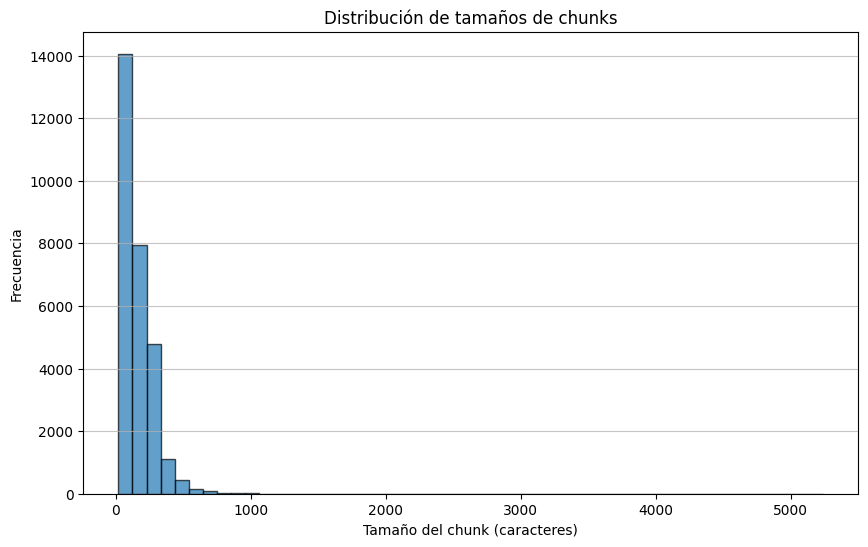

In [ ]:
# Análisis de la distribución de los tamaños de los chunks
import matplotlib.pyplot as plt

# Extraer longitudes de todos los chunks generados
chunk_lengths = [len(chunk["content"]) for file_chunks in all_chunks for chunk in file_chunks["chunks"]]

# Estadísticas descriptivas adicionales
total_chunks = len(chunk_lengths)
longest_chunk = max(chunk_lengths)
shortest_chunk = min(chunk_lengths)
mean_length = sum(chunk_lengths) / total_chunks
median_length = sorted(chunk_lengths)[total_chunks // 2]

print(f"Estadísticas de los chunks:")
print(f"- Total de chunks: {total_chunks}")
print(f"- Chunk más grande: {longest_chunk} caracteres")
print(f"- Chunk más pequeño: {shortest_chunk} caracteres")
print(f"- Longitud promedio: {mean_length:.2f} caracteres")
print(f"- Mediana de longitud: {median_length} caracteres")

# Visualizar la distribución de los tamaños
plt.figure(figsize=(10, 6))
plt.hist(chunk_lengths, bins=50, edgecolor="black", alpha=0.7)
plt.title("Distribución de tamaños de chunks")
plt.xlabel("Tamaño del chunk (caracteres)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()

In [ ]:
# Diagnóstico de chunks pequeños
# Analizar la cantidad y contenido de los chunks menores a 20 caracteres

# Obtener todos los chunks y sus longitudes
small_chunks = [chunk for file_chunks in all_chunks for chunk in file_chunks["chunks"] if len(chunk["content"]) < 20]

# Estadísticas básicas sobre chunks pequeños
total_small_chunks = len(small_chunks)
if total_small_chunks > 0:
    smallest_chunk_length = min(len(chunk["content"]) for chunk in small_chunks)
    largest_small_chunk_length = max(len(chunk["content"]) for chunk in small_chunks)
    print(f"Total de chunks menores a 20 caracteres: {total_small_chunks}")
    print(f"Longitud del chunk más pequeño: {smallest_chunk_length} caracteres")
    print(f"Longitud del chunk más grande entre los pequeños: {largest_small_chunk_length} caracteres")
else:
    print("No se encontraron chunks menores a 20 caracteres.")

# Mostrar ejemplos de chunks pequeños (máximo 10 para revisión)
print("\nEjemplos de chunks pequeños:")
for i, chunk in enumerate(small_chunks[:10]):
    print(f"\nChunk {i + 1}:")
    print(f"Tipo: {chunk['type']}")
    print(f"Contenido: '{chunk['content']}'")
    print(f"Archivo origen: {chunk.get('file_name', 'Desconocido')}")

No se encontraron chunks menores a 20 caracteres.

Ejemplos de chunks pequeños:


# Embeddings

In [ ]:
from embedding import generate_embeddings

# Generar embeddings para todos los chunks
print(f"Generando embeddings para un total de {sum(len(file['chunks']) for file in all_chunks)} chunks...")
all_embeddings = []

for file in all_chunks:
    file_name = file["file_name"]
    chunks = file["chunks"]

    try:
        # Extraer el contenido de los chunks narrativos para embeddings
        chunk_texts = [chunk["content"] for chunk in chunks if chunk["type"] == "narrative"]
        
        # Generar embeddings para los textos narrativos
        embeddings = generate_embeddings(chunk_texts)
        all_embeddings.append({
            "file_name": file_name,
            "embeddings": embeddings,
            "chunks": chunks  # Incluye los chunks originales para mantener contexto
        })
        print(f"Embeddings generados para el archivo {file_name}: {len(embeddings)} embeddings.")
    except Exception as e:
        print(f"Error al generar embeddings para el archivo {file_name}: {e}")

# Validación final
if all_embeddings:
    total_embeddings = sum(len(file["embeddings"]) for file in all_embeddings)
    print(f"\nTotal de embeddings generados: {total_embeddings}")
    print(f"Ejemplo de embedding del archivo {all_embeddings[0]['file_name']}:\n{all_embeddings[0]['embeddings'][0]}")

/Users/maximilianocruz/anaconda3/envs/proyecto_aplicado_rag/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modelo 'all-MiniLM-L6-v2' cargado correctamente.
Cargando el módulo 'embedding'
Generando embeddings para 61412 chunks...
Generando embeddings para 61412 chunks...


Generando embeddings: 100%|██████████| 61412/61412 [29:19<00:00, 34.91chunk/s]    

Total de embeddings generados: 61412
Embeddings y metadatos generados correctamente.


In [11]:
# Mostrar la cantidad de metadatos generados
print(f"Metadatos generados para {len(metadata_list)} chunks.")

Metadatos generados para 61412 chunks.


In [12]:
from vector_store_client import connect_to_qdrant, insert_embeddings

# **Paso 1: Conectar a Qdrant**
qdrant_client = connect_to_qdrant()
print("Conexión a Qdrant establecida con éxito.")

# **Paso 2: Asegurar que las variables necesarias están definidas**
# index_name: Nombre del índice (ya deberías haberlo definido antes)
if 'index_name' not in globals():
    index_name = "regulacion_alimentaria"  # Nombre del índice en Qdrant

# embeddings_list y metadata_list: Verifica que se hayan generado previamente
if 'embeddings_list' not in globals() or 'metadata_list' not in globals():
    raise ValueError("Las listas de embeddings o metadatos no están definidas. Asegúrate de haber generado estas listas.")

# **Paso 3: Insertar embeddings**
print(f"Insertando embeddings en Qdrant en lotes de 100...")
insert_embeddings(qdrant_client, index_name, embeddings_list, metadata_list, batch_size=100)
print("Embeddings generados e insertados en Qdrant con éxito.")

Conexión a Qdrant establecida con éxito.
Insertando embeddings en Qdrant en lotes de 100...
Lot 1 insertado exitosamente con 100 puntos.
Lot 2 insertado exitosamente con 100 puntos.
Lot 3 insertado exitosamente con 100 puntos.
Lot 4 insertado exitosamente con 100 puntos.
Lot 5 insertado exitosamente con 100 puntos.
Lot 6 insertado exitosamente con 100 puntos.
Lot 7 insertado exitosamente con 100 puntos.
Lot 8 insertado exitosamente con 100 puntos.
Lot 9 insertado exitosamente con 100 puntos.
Lot 10 insertado exitosamente con 100 puntos.
Lot 11 insertado exitosamente con 100 puntos.
Lot 12 insertado exitosamente con 100 puntos.
Lot 13 insertado exitosamente con 100 puntos.
Lot 14 insertado exitosamente con 100 puntos.
Lot 15 insertado exitosamente con 100 puntos.
Lot 16 insertado exitosamente con 100 puntos.
Lot 17 insertado exitosamente con 100 puntos.
Lot 18 insertado exitosamente con 100 puntos.
Lot 19 insertado exitosamente con 100 puntos.
Lot 20 insertado exitosamente con 100 punto

In [13]:
import numpy as np
from embedding import generate_embeddings
from vector_store_client import search_qdrant, format_qdrant_results

# **Paso 1: Definir la consulta**
query = "¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?"

# **Paso 2: Generar el embedding de la consulta**

query_embeddings = generate_embeddings([query])  # Generar embeddings
if not query_embeddings or len(query_embeddings) == 0:
    raise ValueError("No se pudo generar el embedding para la consulta. Verifica la función generate_embeddings.")

query_embedding = query_embeddings[0]  # Acceder al primer embedding si existe
print("Embedding de la consulta generado con éxito.")

# **Paso 3: Realizar la búsqueda en Qdrant**
limit = 5  # Número de resultados a devolver
search_results = search_qdrant(qdrant_client, index_name, query_embedding, limit=limit)

# **Paso 4: Formatear y mostrar los resultados**
print(f"\nResultados de la búsqueda para la consulta: '{query}'")
if search_results:
    format_qdrant_results(query, search_results)  # Usa la función para mostrar resultados de forma ordenada
else:
    print("No se encontraron resultados para la consulta.")

Generando embeddings para 1 chunks...


Generando embeddings: 100%|██████████| 1/1 [00:00<00:00,  3.11chunk/s]


Total de embeddings generados: 1
Embedding de la consulta generado con éxito.

Resultados de la búsqueda para la consulta: '¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?'
Consulta: ¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?

Total de resultados encontrados: 5

--------------------------------------------------------------------------------
ID: 8ca9054a-2576-4472-9011-97b655a83b8e
Puntaje de Similitud (score): 0.7606783
Payload completo:
  Contenido es un diccionario con las siguientes claves:
    type: narrative
    content: Cuando cualquiera de aquellos sea importado, se aplicarán los requeri mientos de este Código; dichas exigencias se considerarán también satisfechas cuando los productos provengan de países que cuenten con niveles de contralor alimentario equiparables a los de la República Argentina a criterio de la Autoridad Sanitaria Nacion al, o cuando utilicen las normas del Codex
Al